# Домашня робота №7

# Перетворення випадкових величин

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Квантильне перетворення

### 1.1 Задана щільність

Нехай випадкова величина $\xi$ має щільність
$f(x) = a \sin(x) I_{[0, \pi]}(x),$
де $I_{[c, d]}(x)$ - індикатор на відрізку $[c, d]$.

Знайдіть значення параметра $a$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

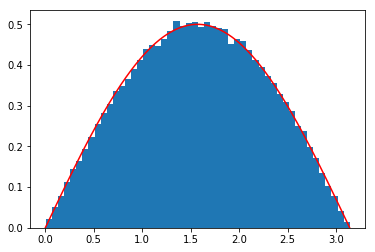

In [14]:
from scipy.stats import norm, uniform, geom, expon
x = np.arange(0, np.pi, 0.01)

plt.hist(np.arccos(1 - 2 * uniform(0, 1).rvs(100000)), bins=50, density=True)
plt.plot(x, np.sin(x) / 2, 'r')
plt.show()


### 1.2 Нормальний розподіл

Нехай випадкова величина $\xi \sim N(0, 1)$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

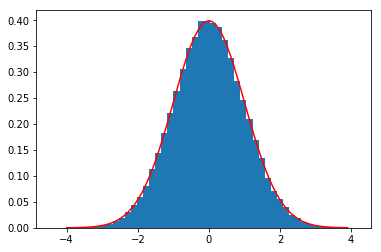

In [7]:
x = np.arange(-4, 4, 0.1)
plt.hist(norm.ppf(uniform(0, 1).rvs(100000)), density=True, bins=50)
plt.plot(x, norm.pdf(x), 'r')
plt.show()


## 2 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ з геометричного розподілу з параметром $p = 0.5$.
Тобто $\xi \sim Geom(0.5)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію ймовірностей випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) > 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію ймовірностей випадкової величини $\xi$.

**Зауваження 1.** Графік функції ймовірнстей краще малювати для $10$ значень.

**Зауваження 2.** У гістограмах проміжок значень слід розбивати на одиничні інтервали.

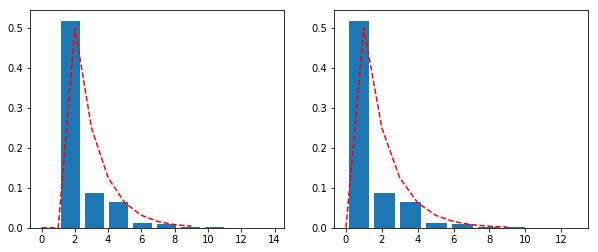

In [12]:
xi = geom(p=0.5).rvs(size=10000)
eta = xi - 1

x = np.arange(0, 10)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(xi, density=True, bins=9, rwidth=0.8)
plt.plot(x, geom(p=0.5, loc=1).pmf(x), 'r--')
plt.subplot(122)
plt.hist(eta, density=True, bins=9, rwidth=0.8)
plt.plot(x, geom(p=0.5).pmf(x), 'r--')
plt.show()


## 3 Задача 1.11.3

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

### 3.1 Експонента

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \exp\{-\xi\}$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

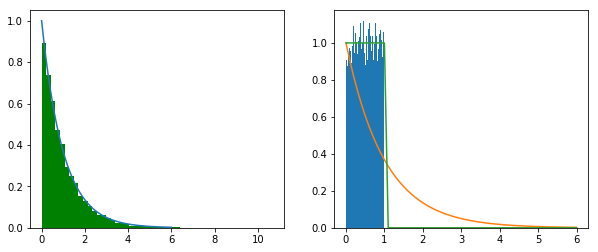

In [20]:
xi = expon.rvs(size=10000)
x = np.arange(0, 6.1, 0.1)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(xi, density=True, bins=50, color='g')
plt.plot(x, expon.pdf(x))

plt.subplot(122)
plt.hist(expon.pdf(xi), density=True, bins=50)
plt.plot(x, expon.pdf(x))
plt.plot(x, uniform.pdf(x))


plt.show()



### 3.2 Квадрат

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \xi^2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


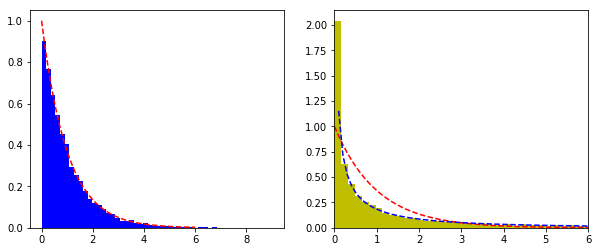

In [32]:
xi = expon.rvs(size=10000)
x = np.arange(0, 6.1, 0.1)

def g(y):
    return np.exp(-np.sqrt(y))/(2*np.sqrt(y))

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(xi, density=True, bins=50, color='b')
plt.plot(x, expon.pdf(x), 'r--')

plt.subplot(122)
plt.xlim((0, 6))
plt.hist(xi**2, density=True, bins=500, color='y')
plt.plot(x, expon.pdf(x), 'r--')
plt.plot(x, g(x), 'b--')


plt.show()



## 4 Задача 1.11.5

Розглянемо випадкову величину $\xi$ зі стандартного рівномірного розподілу.
Тобто $\xi \sim Unif(0, 1)$.

### 4.1 Лінійне перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = 3 \xi - 2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

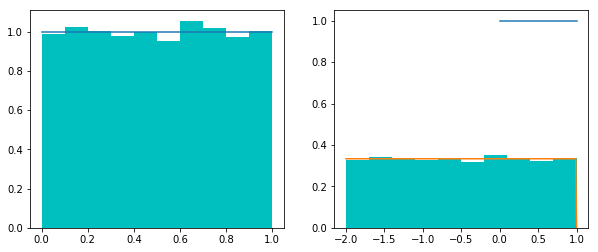

In [43]:
xi = uniform.rvs(size=10000)
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(xi, density=True, bins=10, color='c')
plt.plot(np.arange(0, 1.1, 0.1), uniform.pdf(np.arange(0, 1.1, 0.1)))

plt.subplot(122)
plt.hist(3*xi-2, density=True, bins=10, color='c')
plt.plot(np.arange(0, 1.01, 0.1), uniform.pdf(np.arange(0, 1.1, 0.1)))
plt.plot(np.arange(-2, 1.001, 0.01), uniform(loc=-2, scale=3).pdf(np.arange(-2, 1.001, 0.01)))


plt.show()

### 4.2 Модуль від лінійного перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = |2 \xi - 1|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

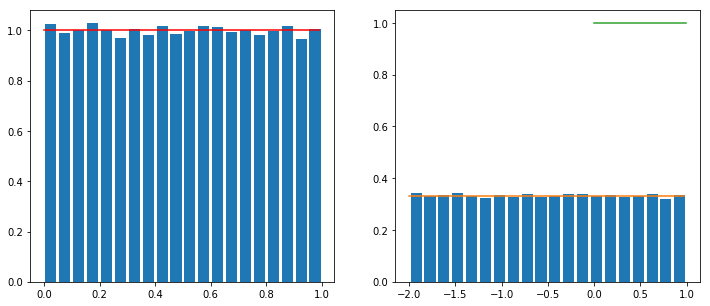

In [45]:
rv = uniform(0, 1)

random = rv.rvs(100_000)
x = np.arange(0, 1, 0.01)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(random, bins=20, density=True, rwidth=0.8)
plt.plot(x, rv.pdf(x), 'r')


plt.subplot(1,2,2)
plt.hist(3*random - 2, bins=20, density=True, rwidth=0.8)
plt.plot(3*x - 2, rv.pdf((x + 2) / 3) / 3)
plt.plot(x, rv.pdf(x))


plt.show()

### 4.3 Логарифм

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = - \log \xi$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

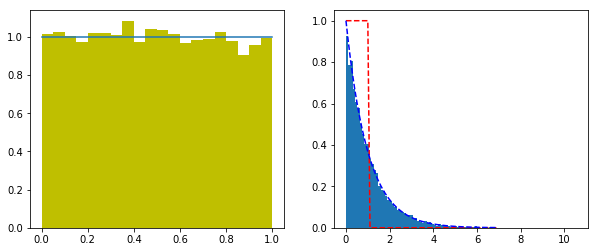

In [51]:
xi = uniform.rvs(size=10000)


plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(xi, density=True, bins=20, color='y')
plt.plot(np.arange(0, 1.1, 0.1), uniform.pdf(np.arange(0, 1.1, 0.1)))

x = np.arange(0, 7, 0.1)
plt.subplot(122)
plt.hist(-np.log(xi), density=True, bins=100)
plt.plot(x, uniform.pdf(x), 'r--')
plt.plot(x, expon.pdf(x), 'b--')


plt.show()

## 5 Одиничний квадрат

Реалізуйте вадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

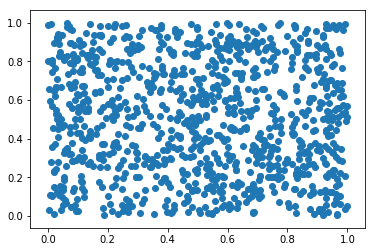

In [60]:
x, y = uniform(), uniform()

plt.scatter(x.rvs(size=1000), y.rvs(size=1000));

Знайдіть функцію щільності випадкової величини $\xi_1 = x^2 + y^2$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_1$,
отриманою перетвореннями випадкових величин $x, y$.

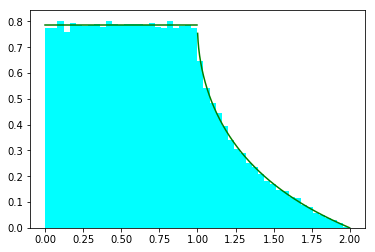

In [85]:
n = 100000
xi = tuple(zip(uniform.rvs(size=n), uniform.rvs(size=n)))
xi1 = [xi[i][0]**2 + xi[i][1]**2 for i in range(len(xi))]

z1 = np.arange(1.001, 2, 0.001)
f1 = np.pi/4 - np.arccos(z1**(-0.5)) -0.5*(z1-1)**(-0.5) + 0.5*(z1-1)**(-0.5)
z2 = np.arange(0, 1.5, 0.5)
f2 = [np.pi/4 for i in range(len(z2))]
plt.hist(xi_1, density=True, bins=50, color='cyan')
plt.plot(z1, f1, 'g', z2, f2, 'g')
plt.show()



Знайдіть функцію щільності випадкової величини $\xi_2 = \max (x, y)$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_2$,
отриманою перетвореннями випадкових величин $x, y$.

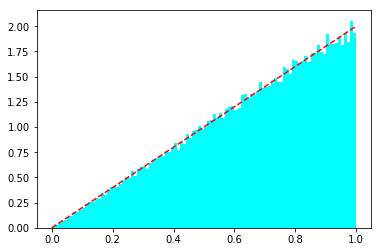

In [76]:
xi2 = Xi.rvs(size=100000).max(axis=1)

plt.hist(xi2, density=True, bins=100, color='cyan')
x = np.arange(0, 1.01, 0.01)
plt.plot(x, 2*x, 'r--')
plt.show()


Знайдіть функцію щільності випадкової величини $\xi_3 = |x - y|$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

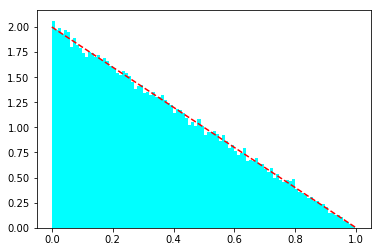

In [72]:
xi3 = Xi.rvs(size=100000)
xi3 = np.abs(xi3[:, 0] - xi3[:, 1])

plt.hist(xi3, density=True, bins=100, color='cyan')
x = np.arange(0, 1.01, 0.01)
plt.plot(x, 2-2*x, 'r--')
plt.show()

